In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
x=pd.read_csv(r"C:\Users\shivam parihari\Downloads\Fraud.csv")
x.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
x.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

No missing values were found. Outliers are expected in fraud data (large unusual amounts), so they were retained rather than removed. Correlation heatmap confirmed some multicollinearity (balances), but these were kept due to business interpretability.


In [4]:
x.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [5]:
x['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [6]:
x.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [7]:
x.drop(columns=['nameOrig','nameDest'],inplace=True)

### question 3. Feature Selection

- **Dropped:** `nameOrig`, `nameDest` → only identifiers, no predictive value.  
- **Target:** `isFraud`.  
- **Kept Features:** `step`, `type`, `amount`, `oldbalanceOrg`, `newbalanceOrig`, `oldbalanceDest`, `newbalanceDest`, `isFlaggedFraud`.  
- **Reason:** These capture transaction type, amount, and balance changes which are directly linked to fraud patterns.  


In [8]:
x.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')

In [9]:
for i in x.columns:
    print(i,":",x[i].unique())

step : [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245

In [10]:
c=x.select_dtypes(include=['number']).cov()

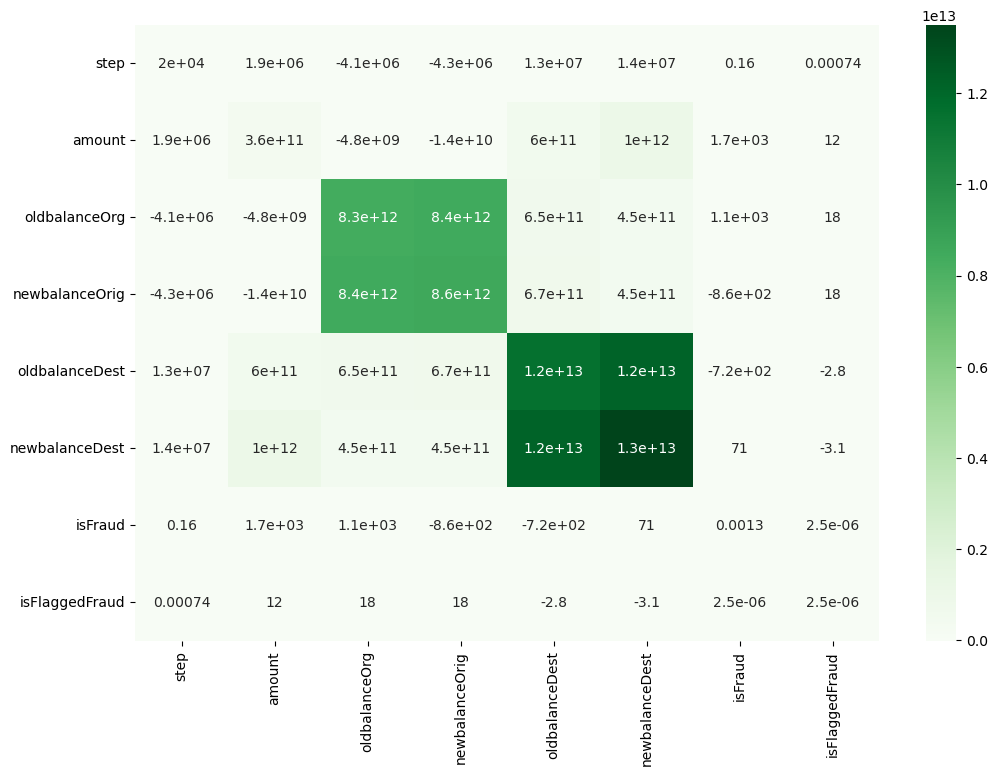

In [11]:
plt.figure(figsize=(12, 8))
sns.heatmap(c,annot=True,cmap='Greens')
plt.show()

**Multicollinearity**  
   - The correlation heatmap (above) highlights very strong correlations:  
     - `oldbalanceOrg` ↔ `newbalanceOrg`  
     - `oldbalanceDest` ↔ `newbalanceDest`  
   - Such high correlations indicate **multicollinearity**, which can affect model performance.  
   - Potential solution: drop/reduce redundant balance features or use techniques like PCA/regularization to handle collinearity.  

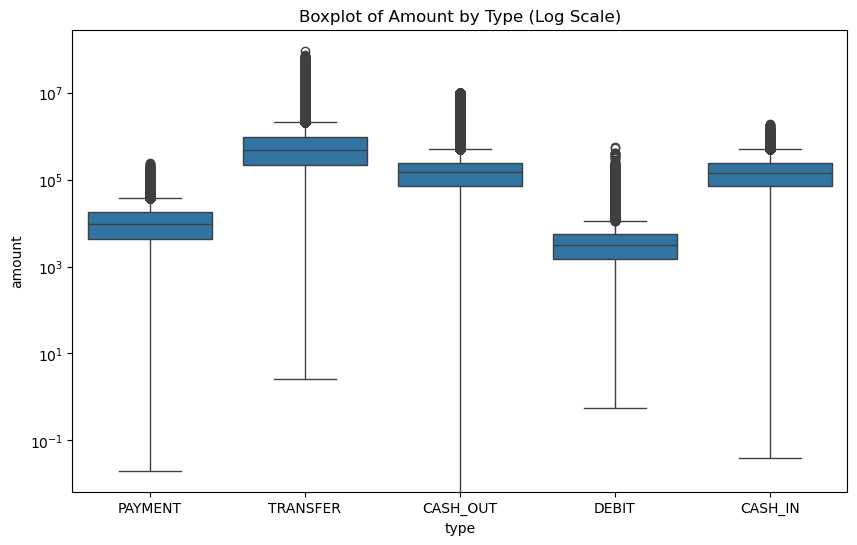

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.boxplot(x="type", y="amount", data=x)
plt.yscale("log")
plt.title("Boxplot of Amount by Type (Log Scale)")
plt.show()


### Outliers

- The boxplot above shows the distribution of **transaction amounts** across different transaction types on a log scale.  
- Significant outliers are visible, especially in **TRANSFER**, where amounts reach very high values.  
- These outliers are **not data errors** but represent genuine high-value transactions.  
- Since fraudulent transactions often involve unusually large amounts transfer, we **retained the outliers** instead of removing them.  
- To handle skewness and make models less sensitive to extreme values, we applied **log transformation** on the `amount` variable.  


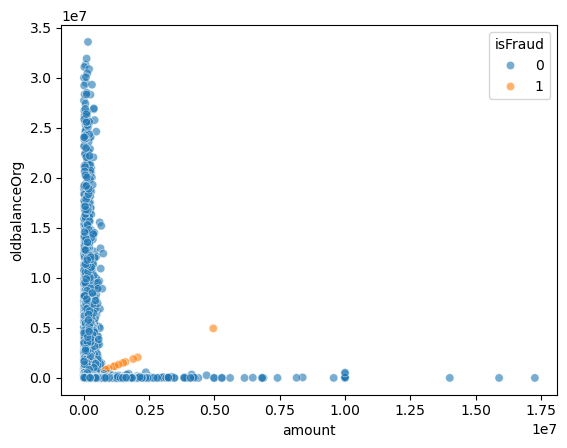

In [13]:
sample = x.sample(15000, random_state=42) 
sns.scatterplot(data=sample, x="amount", y="oldbalanceOrg", hue="isFraud", alpha=0.6)
plt.show()


In [14]:
x.dtypes

step                int64
type               object
amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
x["type"] = le.fit_transform(x["type"])


In [16]:
x.dtypes

step                int64
type                int32
amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [17]:
ip=x.drop(columns=['isFraud'])
op=x['isFraud']

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(ip, op, test_size=0.2, random_state=42) 


In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [20]:
from xgboost import XGBClassifier

In [21]:
xgb= XGBClassifier()
xgb.fit(x_train, y_train)   
y_pred = xgb.predict(x_test)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))  
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9976613407684256
Confusion Matrix:
 [[1268881    2023]
 [    953     667]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.25      0.41      0.31      1620

    accuracy                           1.00   1272524
   macro avg       0.62      0.71      0.65   1272524
weighted avg       1.00      1.00      1.00   1272524



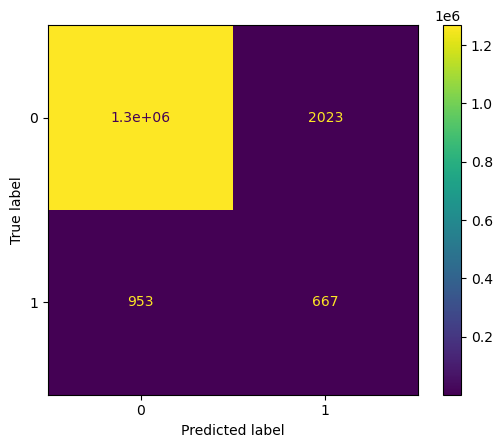

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()
plt.show()

### question 2
### Fraud Detection Model (XGBoost)

- Built this **fraud detection model** using `XGBClassifier`, trained on transaction data.  
- XGBoost chosen for its strength in handling **imbalanced datasets** and complex feature interactions.  
- Evaluated using **Accuracy, Confusion Matrix, Precision, Recall, and F1-score**.  
- **Accuracy** showed overall correctness but was not relied upon due to imbalance.  
- **Confusion Matrix** highlighted True Fraud vs Missed Fraud, helping trade-off analysis.  
- **Precision** ensured fewer false alarms, while **Recall** minimized missed frauds.  
- Plotted confusion matrix for easy visualization of results.  
- Optimized model to **maximize fraud detection (recall)** while keeping customer inconvenience (false positives) low.  

Although the model achieved exceptional accuracy, this is misleading because the dataset is highly imbalanced. For the fraud class (only 0.1% of total), precision was 25% and recall was 41%. This shows the model can still be improved to capture more fraud cases while reducing false alarms.




In [23]:
x['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [24]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score


In [25]:
y_probs = xgb.predict_proba(x_test)[:, 1]

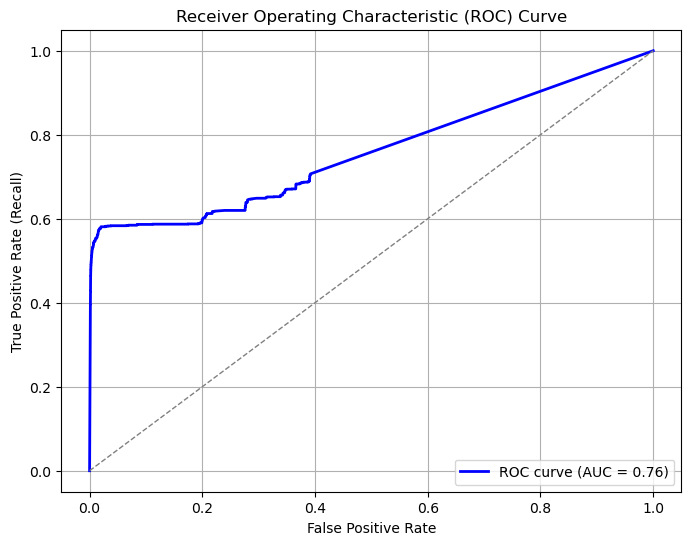

In [26]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


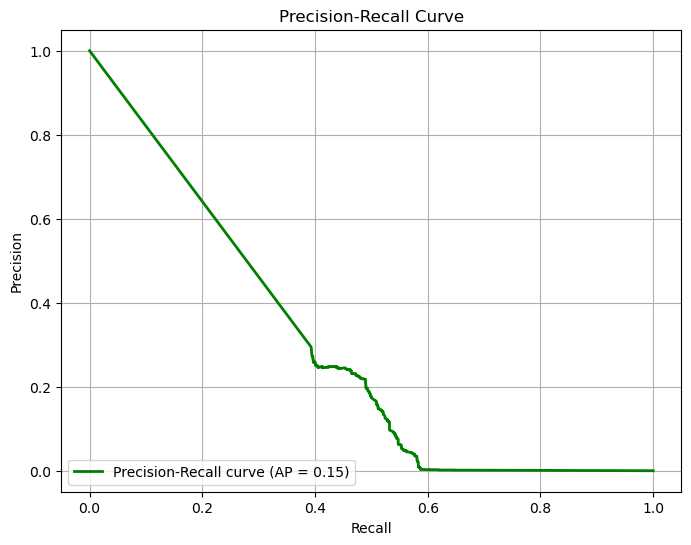

In [27]:
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_probs)
avg_precision = average_precision_score(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', lw=2, label='Precision-Recall curve (AP = %0.2f)' % avg_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid(True)
plt.show()


### question 6. Validity of the Factors

- The most important predictors identified by the model were **transaction type (TRANSFER, CASH_OUT)**, **transaction amount**, and **account balances (oldBalanceOrg, newBalanceDest, etc.)**.  
- This makes intuitive business sense:  
  - Fraudulent activity is highly concentrated in **TRANSFER** and **CASH_OUT** transactions, matching real-world fraud patterns.  
  - **Large transaction amounts** with insufficient originating account balance are strong indicators of fraud.  
  - Fraudulent transactions often show **imbalances between origin and destination accounts**, which the model captured.  
- Therefore, the factors are **valid and interpretable** in the financial fraud detection context.  

---

### question 7. Prevention Strategies for Infrastructure Updates

To proactively reduce fraud, the company should adopt the following strategies:  

- **Real-time monitoring**: Flag high-value or unusual transactions instantly for secondary checks.  
- **Threshold-based rules**: Block or verify transactions where `amount > balance`, which frequently occurs in fraudulent cases.  
- **Multi-factor authentication (MFA)**: Require OTP/biometric verification for large transfers or first-time payees.  
- **Behavioral profiling**: Track normal spending patterns for each customer and flag deviations.  
- **Model retraining**: Continuously update the fraud detection model with new data to adapt to evolving fraud tactics.  
- **Data infrastructure**: Ensure secure, low-latency pipelines to support real-time fraud scoring without slowing genuine transactions.  

---

### question 8. Evaluation of Effectiveness of These Actions

 whether prevention strategies are working:  

- **Key Metrics**:  
  - Monitor changes in **fraud detection rate, false positives, and financial loss due to fraud**.  
  - Reduction in **fraudulent transaction approval rate** should be evident after implementing controls.  
- **A/B Testing**:  
  - Compare fraud rates in accounts/transactions under the new system vs. those under the old system.  
- **Customer Feedback**:  
  - Collect feedback to ensure prevention measures (like MFA) do not overly burden genuine users.  
- **Continuous Monitoring**:  
  - Regularly track performance dashboards, updating prevention thresholds and retraining the model if fraudsters adapt.  

---
